
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

#It is a classification problem.Because, the ultimate aim of the project is to identify the class of students who need intervention in their study.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Read student data
student_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\student-data.csv")
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [21]:
# Calculate number of students
total_students=len(student_df.index)
print('Total number of students: ',total_students)


Total number of students:  395


In [22]:
# Calculate number of features
shape = student_df.shape
print('Number of features :', shape[1])

Number of features : 31


In [23]:
# Calculate passing students
passed = (student_df['passed'] == 'yes').sum()
print('Number of students passed is: ',passed)

Number of students passed is:  265


In [24]:
# Calculate failing students
failed = (student_df['passed'] == 'no').sum()
print('Number of students failed is: ',failed)

Number of students failed is:  130


In [25]:
# Calculate graduation rate
graduation_rate =(((student_df['passed'] == 'yes').sum())*100)/(len(student_df.index))



In [26]:
# Print the results
print('Graduation Rate is:%.2f' %graduation_rate,round)

Graduation Rate is:67.09 <built-in function round>


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns

In [27]:
student_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\student-data.csv")
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [11]:
x=student_df.iloc[:,:-1]
x.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,passed_no
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,0,1,1,0,1,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,1,0,1,1,0,1
2,15,1,1,1,2,3,4,3,2,2,...,0,0,1,0,1,0,1,1,0,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,1,0,1,0,1,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,0,1,1,0,1,0,0


In [12]:
# Extract target column 'passed'

In [12]:
y=student_df.iloc[:,-1]
y.head()

0    0
1    0
2    1
3    1
4    1
Name: passed_yes, dtype: uint8

In [30]:
student_df=student_df.drop('school',axis=1,inplace=True)

In [15]:
# Separate the data into feature data and target data (X and y, respectively)

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [9]:
student_df=pd.get_dummies(student_df)
student_df.head() 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,passed_no,passed_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,0,0,1


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [13]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.24, random_state=42)


In [14]:
# Show the results of the split
x_train.shape


(300, 57)

In [15]:
y_train.shape

(300,)

In [16]:
x_test.shape

(95, 57)

In [17]:
y_test.shape

(95,)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

1.Scikit Learn - Linear Regression 
2.Random Forest Classifier
3.Decision Tree Algorithm 

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

#explaination
1.Scikit Learn - Logistic Regression - It is one of the best statistical models that studies the relationship between a dependent variable (Y) with a given set of independent variables (X).
Disadvantages Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting.
2.Random Forest Classifier: It reduces overfitting in decision trees and helps to improve the accuracy. It is flexible to both classification and regression problems. It works well with both categorical and continuous values. It automates missing values present in the data.
Disadvantage:Random forests is slow in generating predictions because it has multiple decision trees.The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.
3.Decision Tree Algorithm implementation with scikit learn One of the cutest and lovable supervised algorithms is Decision Tree Algorithm. It can be used for both the classification as well as regression purposes also.
Disadvantage:A small change in the data can cause a large change in the structure of the decision tree causing instability.

In [18]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
# fit model-1  on traning data 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.24)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# predict on the test data 

In [21]:

logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# calculate the accuracy score

In [22]:
print('Accuracy is',accuracy_score(y_test,y_pred)*100)


Accuracy is 100.0


In [ ]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [23]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [24]:
print("Precision Score : ",precision_score(y_test, y_pred,                                           
                                           average='micro')*100)
print("Recall Score : ",recall_score(y_test, y_pred,                                           
                                           average='micro')*100)
print("f1_score : ",f1_score(y_test, y_pred,                             
                                           average='micro')*100) 


Precision Score :  100.0
Recall Score :  100.0
f1_score :  100.0


In [ ]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [26]:
#Fit decision tree regressor to the dataset
x=student_df.iloc[:,:-1]
y=student_df.iloc[:,-1]

  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [27]:

f1_score(y_test,y_pred)

1.0

In [ ]:
# All the three models predict 100% accuracy

[Text(167.4, 163.07999999999998, 'X[56] <= 0.5\nsquared_error = 0.221\nsamples = 395\nvalue = 0.671'),
 Text(83.7, 54.360000000000014, 'squared_error = 0.0\nsamples = 265\nvalue = 1.0'),
 Text(251.10000000000002, 54.360000000000014, 'squared_error = 0.0\nsamples = 130\nvalue = 0.0')]

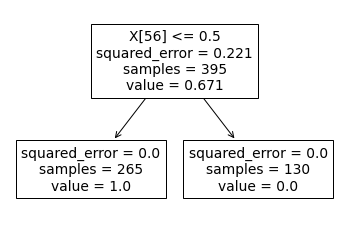

In [28]:
from sklearn import tree
tree.plot_tree(regressor) 